<a href="https://colab.research.google.com/github/bvsvarshini/Cats-vs-Dogs-Classification-using-CNN/blob/main/Cats_vs_Dogs_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.5328 - loss: 0.6949 - val_accuracy: 0.6375 - val_loss: 0.6599
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.6029 - loss: 0.6649 - val_accuracy: 0.6495 - val_loss: 0.6295
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.6551 - loss: 0.6308 - val_accuracy: 0.6875 - val_loss: 0.5936
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.6887 - loss: 0.5967 - val_accuracy: 0.6655 - val_loss: 0.6005
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.7065 - loss: 0.5681 - val_accuracy: 0.7195 - val_loss: 0.5530
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7154 - loss: 0.5581 - val_accuracy: 0.7175 - val_loss: 0.5442
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7275 - loss: 0.5424 - val_accuracy: 0.7395 - val_loss: 0.5258
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.7303 - loss: 0.5253 - val

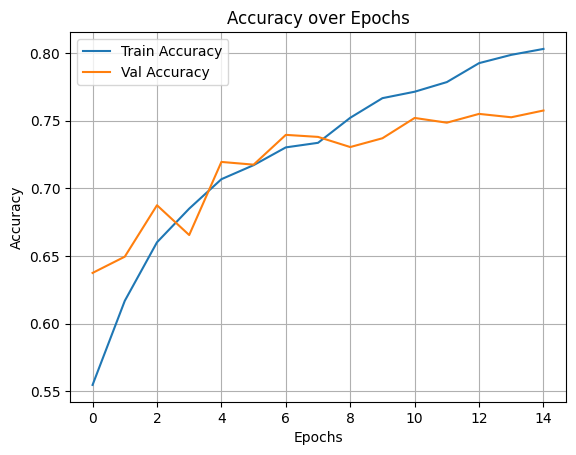

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


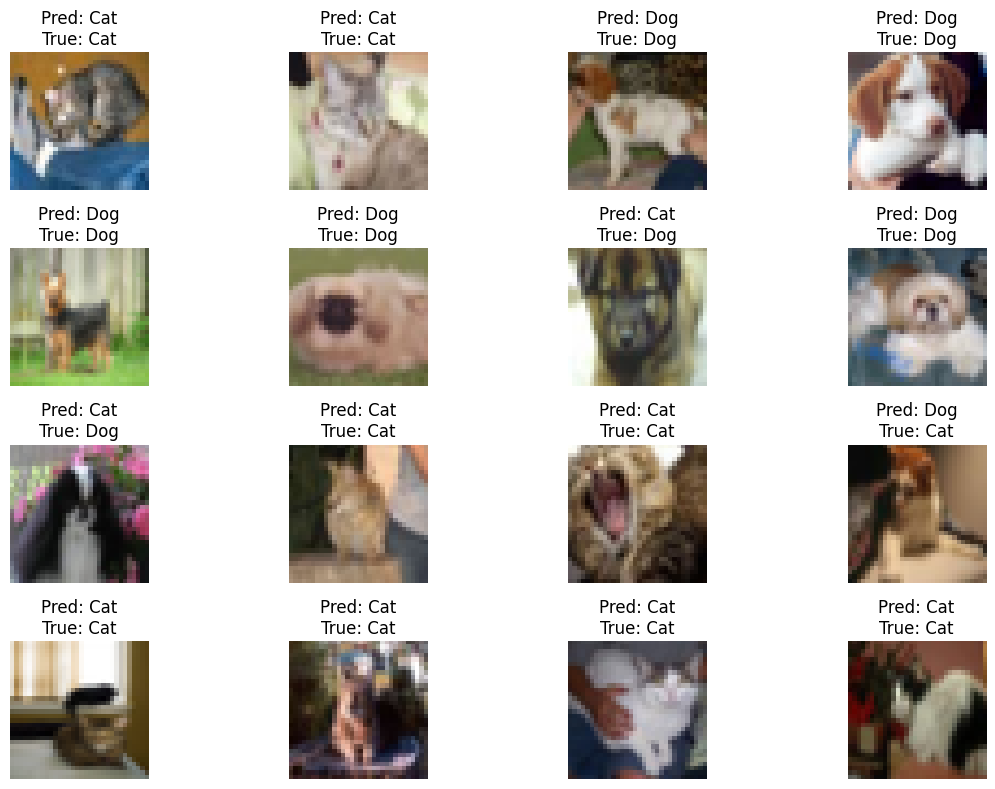


=== Multi-Class Classification: CIFAR-10 ===
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 148ms/step - accuracy: 0.3049 - loss: 1.8797 - val_accuracy: 0.5589 - val_loss: 1.2332
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 145ms/step - accuracy: 0.5494 - loss: 1.2546 - val_accuracy: 0.6412 - val_loss: 1.0281
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 155ms/step - accuracy: 0.6303 - loss: 1.0582 - val_accuracy: 0.6645 - val_loss: 0.9502
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 153ms/step - accuracy: 0.6680 - loss: 0.9520 - val_accuracy: 0.7113 - val_loss: 0.8489
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 151ms/step - accuracy: 0.6929 - loss: 0.8715 - val_accuracy: 0.7231 - val_loss: 0.7894
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 147ms/step - accuracy: 0.7114 - loss: 0.8164 - val_accuracy: 0.7376 - val_loss: 0.7651
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 147ms/step - accuracy: 0.7310 - loss: 0.7660 - val_accuracy: 0.7293 - val_loss: 0.7787
Epoch 8/15
782/782 ━━━━━━━━━━━

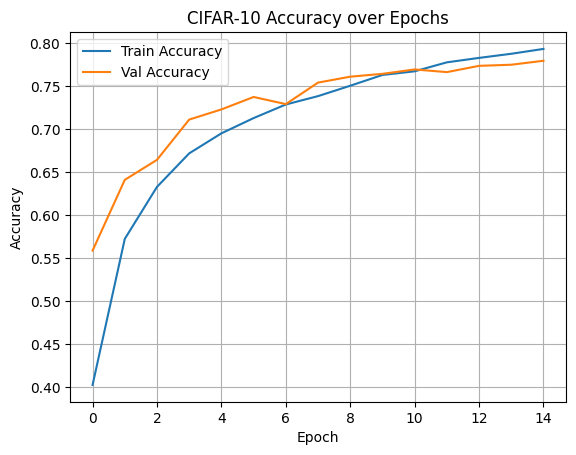

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

(img_train, label_train), (img_test, label_test) = tf.keras.datasets.cifar10.load_data()

train_filter = np.where((label_train == 3) | (label_train == 5))[0]
test_filter = np.where((label_test == 3) | (label_test == 5))[0]

img_train, label_train = img_train[train_filter], label_train[train_filter]
img_test, label_test = img_test[test_filter], label_test[test_filter]

label_train = (label_train == 5).astype(int)
label_test = (label_test == 5).astype(int)

img_train = img_train / 255.0
img_test = img_test / 255.0

from sklearn.model_selection import train_test_split
img_train, img_val, label_train, label_val = train_test_split(img_train, label_train, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(img_train, label_train, validation_data=(img_val, label_val), epochs=15, batch_size=64, verbose=1)

test_loss, test_acc = model.evaluate(img_test, label_test)
print(f"Test Accuracy: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

predictions = (model.predict(img_test[:16]) > 0.5).astype("int32")

plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(img_test[i])
    plt.title(f"Pred: {'Dog' if predictions[i][0] == 1 else 'Cat'}\nTrue: {'Dog' if label_test[i] == 1 else 'Cat'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n=== Multi-Class Classification: CIFAR-10 ===")

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

multi_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:]),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

multi_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

multi_history = multi_model.fit(
    x_train, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test_cat)
)

multi_loss, multi_accuracy = multi_model.evaluate(x_test, y_test_cat)
print(f'Test Loss: {multi_loss:.4f}, Test Accuracy: {multi_accuracy:.4f}')

plt.plot(multi_history.history['accuracy'], label='Train Accuracy')
plt.plot(multi_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CIFAR-10 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
